# Covid-19 Evolution in México

### With data from the ministry of health and the John Hopkins CSSE, we analyze the evolution of confirmed covid-19 cases and fatalities in Mexico.

- We smooth the official figures under different techniques (moving sum and moving average) in order to capture the real trend of the contagious phase, as daily data is very noisy.
- We provide 95% bootstrapping interval when appropriate.

Note: Plot text is in Spanish.

In [0]:
#!pip install bayesian_bootstrap

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#from bayesian_bootstrap.bootstrap import mean, highest_density_interval

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def boostrap_mean(sample, sample_size, n_iterations):
	bootstrap_samples=np.random.choice(sample, size=(n_iterations,sample_size), replace=True)
	mean_array=np.mean(bootstrap_samples, axis=1)
	data_mean=np.mean(mean_array)
	lower=np.percentile(mean_array,2.5)
	upper=np.percentile(mean_array,97.5)
	return data_mean, lower, upper

In [0]:
df6 = pd.read_csv('https://raw.githubusercontent.com/maybje/covid_19/master/datos/daily_cases_ma.csv', error_bad_lines=False)
#df6.mexico[df6.loc[:,"semana"]==14]=2363
y6=df6.iloc[:,1]
x6=df6.iloc[:,0]
y6=y6.values
x6=x6.values-1
n=len(y6)

In [0]:
boots_ma=[]
np.random.seed(21)
ma=7
s=ma
for d in range(ma-1,len(y6)):
    boot=boostrap_mean(y6[d-ma+1:d], y6[d-ma+1:d].shape[0],10000)
    boots_ma.append([boot[0], "mean",s])
    boots_ma.append([boot[1], "lower",s])
    boots_ma.append([boot[2], "upper",s])
    s+=1


In [0]:
#clrs = ["red" for ele in range(0,n-6,)]+["#940000" for ele in range(1,len(forecast)+1)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  


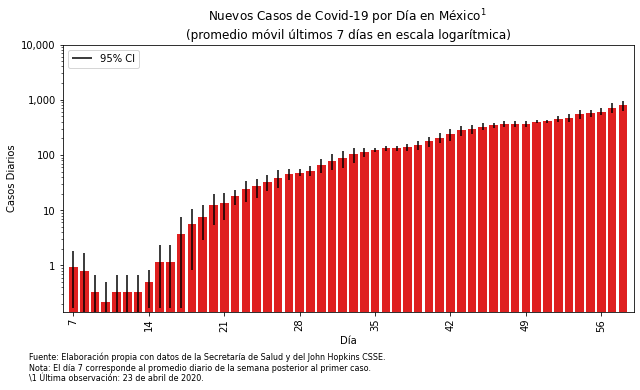

In [0]:
fig, ax = plt.subplots(1, 1,figsize=(9, 5))
df_ma= pd.DataFrame(boots_ma, columns=['Boostrap Iterations', 'Mean', "Value"])
plot_ma = sns.barplot("Value",'Boostrap Iterations',data=df_ma,color="red",ci=None)
plot_ma.set(xlabel='Día', ylabel='Casos Diarios') #labeling axis
xma=list(range(0,df_ma[df_ma.Mean=="mean"].shape[0])) #X axis is defined
up=df_ma[df_ma.Mean=="upper"].iloc[:,0]
lower=df_ma[df_ma.Mean=="lower"].iloc[:,0]
mean=df_ma[df_ma.Mean=="mean"].iloc[:,0]
plt.vlines(xma, lower, up,label='95% CI')

plot_ma.set_yscale('log')
plot_ma.legend(loc="upper left") #adding legend
plot_ma.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plot_ma.set_ylim((0,10000))
plot_ma.set_xlim((-1,len(y6)-ma+1))
plt.xticks(np.arange(0,len(y6)-6,7), np.arange(7,len(y6)+1,7),rotation=90)
plot_ma.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda y, p: format(int(y), ',')))
plt.title("Nuevos Casos de Covid-19 por Día en México$^1$ \n(promedio móvil últimos 7 días en escala logarítmica)")
plt.figtext(0.05,0.01, "Fuente: Elaboración propia con datos de la Secretaría de Salud y del John Hopkins CSSE.\
\nNota: El día 7 corresponde al promedio diario de la semana posterior al primer caso.\
\n\\1 Última observación: 23 de abril de 2020.", fontsize=8, va="top", ha="left")
plt.tight_layout()
plt.savefig("covid_ma.png", bbox_inches='tight') #saving figure

In [0]:
suma_acum=[[y6[0],1]]
for d in range(1,len(y6)):
  suma_acum.append([sum([suma_acum[d-1][0],y6[d]]),d+1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  


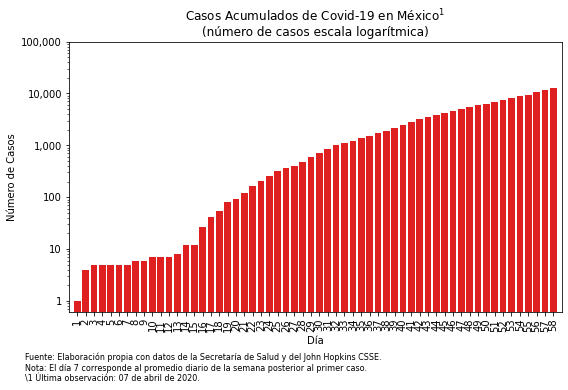

In [0]:
fig, ax = plt.subplots(1, 1,figsize=(8, 5))
df_sa= pd.DataFrame(suma_acum, columns=['suma', 'dia'])
plot_sa = sns.barplot("dia",'suma',data=df_sa,color="red",ci=None)
plot_sa.set(xlabel='Día', ylabel='Número de Casos') #labeling axis
plot_sa.set_yscale('log')
#plot_sa.legend(loc="upper left") #adding legend
plot_sa.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plot_sa.set_ylim((0,100000))
plot_sa.set_xlim((-1,len(y6)))
plt.xticks(rotation=90)
plot_sa.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda y, p: format(int(y), ',')))
plt.title("Casos Acumulados de Covid-19 en México$^1$ \n(número de casos escala logarítmica)")
plt.figtext(0.05,0.01, "Fuente: Elaboración propia con datos de la Secretaría de Salud y del John Hopkins CSSE.\
\nNota: El día 7 corresponde al promedio diario de la semana posterior al primer caso.\
\n\\1 Última observación: 07 de abril de 2020.", fontsize=8, va="top", ha="left")
plt.tight_layout()
plt.savefig("covid_sa.png", bbox_inches='tight') #saving figure

In [0]:
suma_movil=[]
for d in range(6,len(y6)):
  suma_movil.append([sum(y6[d-6:d]),d+1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]


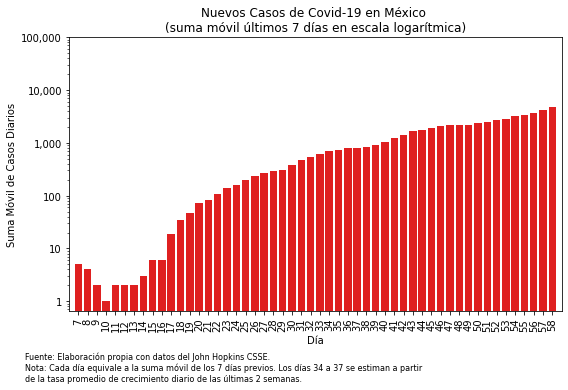

In [0]:
fig, ax = plt.subplots(1, 1,figsize=(8, 5))
df_sum= pd.DataFrame(suma_movil, columns=['suma','dia'])
plot_ma = sns.barplot("dia",'suma',data=df_sum,color="red",ci=None)
plot_ma.set(xlabel='Día', ylabel='Suma Móvil de Casos Diarios') #labeling axis
xma=list(range(0,df_sum.shape[0])) #X axis is defined
#up=df_sum.iloc[:,2]
#lower=df_sum.iloc[:,1]
#mean=df_sum[df_ma.Mean=="mean"].iloc[:,0]
#plt.vlines(xma, lower, up,label='95% CI')
plot_ma.set_yscale('log')
#plot_ma.legend(loc="upper left") #adding legend
plot_ma.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plot_ma.set_ylim((0,100000))
plot_ma.set_xlim((-1,len(suma_movil)))
plt.xticks(rotation=90)
plot_ma.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda y, p: format(int(y), ',')))
plt.title("Nuevos Casos de Covid-19 en México \n(suma móvil últimos 7 días en escala logarítmica)")
plt.figtext(0.05,0.01, "Fuente: Elaboración propia con datos del John Hopkins CSSE.\
\nNota: Cada día equivale a la suma móvil de los 7 días previos. Los días 34 a 37 se estiman a partir \
\nde la tasa promedio de crecimiento diario de las últimas 2 semanas. ", fontsize=8, va="top", ha="left")
plt.tight_layout()
plt.savefig("covid_suma.png", bbox_inches='tight') #saving figure

In [0]:
df7 = pd.read_csv('https://raw.githubusercontent.com/maybje/covid_19/master/datos/covid_daily_fatalities.csv', error_bad_lines=False)
#df6.mexico[df6.loc[:,"semana"]==14]=2363
y7=df7.iloc[:,1]
x7=df7.iloc[:,0]
y7=y7.values
x7=x7.values-1
n=len(y7)

In [0]:
suma_movilf=[]
for d in range(6,len(y7)):
  suma_movilf.append([sum(y7[d-6:d]),d+1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  if __name__ == '__main__':


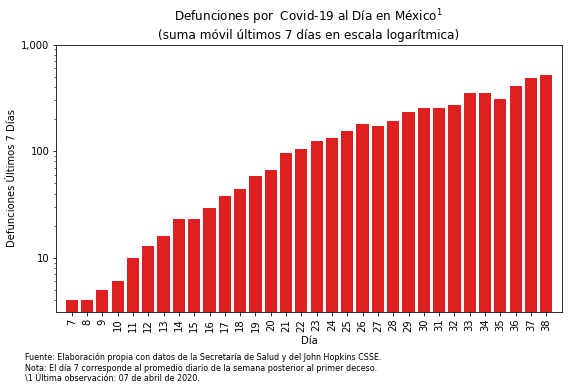

In [0]:
fig, ax = plt.subplots(1, 1,figsize=(8, 5))
df_maf= pd.DataFrame(suma_movilf, columns=['suma','dia'])
plot_maf = sns.barplot("dia",'suma',data=df_maf,color="red",ci=None)
plot_maf.set(xlabel='Día', ylabel='Defunciones Últimos 7 Días') #labeling axis
xmaf=list(range(0,df_maf.shape[0])) #X axis is defined
plot_maf.set_yscale('log')
#plot_maf.legend(loc="upper left") #adding legend
plot_maf.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plot_maf.set_ylim((0,1000))
plot_maf.set_xlim((-1,len(y7)-6))
plt.xticks(rotation=90)
plot_maf.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda y, p: format(int(y), ',')))
plt.title("Defunciones por  Covid-19 al Día en México$^1$ \n(suma móvil últimos 7 días en escala logarítmica)")
plt.figtext(0.05,0.01, "Fuente: Elaboración propia con datos de la Secretaría de Salud y del John Hopkins CSSE.\
\nNota: El día 7 corresponde al promedio diario de la semana posterior al primer deceso.\
\n\\1 Última observación: 07 de abril de 2020.", fontsize=8, va="top", ha="left")
plt.tight_layout()
plt.savefig("covid_maf.png", bbox_inches='tight') #saving figure

In [0]:
boots_maf=[]
np.random.seed(21)
ma=7
s=ma
for d in range(ma-1,len(y7)):
    boot=boostrap_mean(y7[d-ma+1:d], y7[d-ma+1:d].shape[0],10000)
    boots_maf.append([boot[0], "mean",s])
    boots_maf.append([boot[1], "lower",s])
    boots_maf.append([boot[2], "upper",s])
    s+=1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  


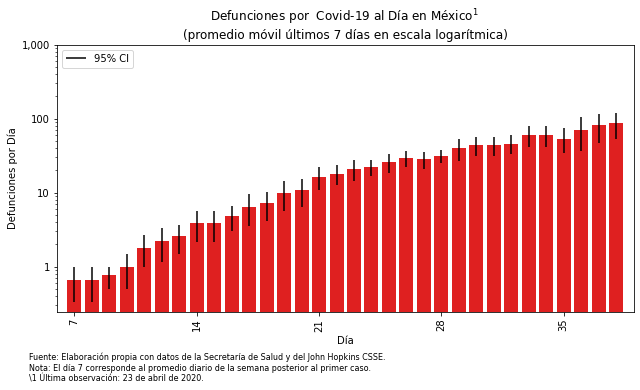

In [0]:
fig, ax = plt.subplots(1, 1,figsize=(9, 5))
df_ma= pd.DataFrame(boots_maf, columns=['Boostrap Iterations', 'Mean', "Value"])
plot_ma = sns.barplot("Value",'Boostrap Iterations',data=df_ma,color="red",ci=None)
plot_ma.set(xlabel='Día', ylabel='Defunciones por Día') #labeling axis
xma=list(range(0,df_ma[df_ma.Mean=="mean"].shape[0])) #X axis is defined
up=df_ma[df_ma.Mean=="upper"].iloc[:,0]
lower=df_ma[df_ma.Mean=="lower"].iloc[:,0]
mean=df_ma[df_ma.Mean=="mean"].iloc[:,0]
plt.vlines(xma, lower, up,label='95% CI')

plot_ma.set_yscale('log')
plot_ma.legend(loc="upper left") #adding legend
plot_ma.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plot_ma.set_ylim((0,1000))
plot_ma.set_xlim((-1,len(y7)-ma+1))
plt.xticks(np.arange(0,len(y7)-6,7), np.arange(7,len(y7)+1,7),rotation=90)
plot_ma.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda y, p: format(int(y), ',')))
plt.title("Defunciones por  Covid-19 al Día en México$^1$ \n(promedio móvil últimos 7 días en escala logarítmica)")
plt.figtext(0.05,0.01, "Fuente: Elaboración propia con datos de la Secretaría de Salud y del John Hopkins CSSE.\
\nNota: El día 7 corresponde al promedio diario de la semana posterior al primer caso.\
\n\\1 Última observación: 23 de abril de 2020.", fontsize=8, va="top", ha="left")
plt.tight_layout()
plt.savefig("covid_maf.png", bbox_inches='tight') #saving figure

In [0]:
#for r in range(0,len(y6)):
#  if r==0:
#    y_acum=[y6[r]]
#  else: 
#    i=r-1
#    y_acum.append(y_acum[i]+y6[r])

#delta=(np.array(y_acum[1:])/np.array(y_acum[:-1]))-1

In [0]:
"""boots_delta=[]
np.random.seed(21)
s=0
boot_delta=boostrap_mean(delta[-7:-1],len(delta[-7:-1]),10000)
boot_delta_std=boostrap_std(delta[-7:-1],len(delta[-7:-1]),10000)
f=7
epsilon=np.random.normal(0,1,(10000,f))
forecast=np.zeros(((10000,f)))
for d in range(f):
  if d==0:
    forecast[:,d]=y_acum[-1]*((1+boot_delta[0])*(1+boot_delta_std*epsilon[:,d]))
  else:
    forecast[:,d]=forecast[:,d-1]*((1+boot_delta[0])*(1+boot_delta_std*epsilon[:,d]))

#fore=np.append(np.mean(forecast,axis=0),np.percentile(forecast,[2.5],axis=0),np.percentile(forecast,[97.5],axis=0))
"""